<h2>🚩Представление ошибки в машинном обучении</h2>

<b>✅Идеальный алгоритм</b> - алгоритм, ответы которого максимально близки к действительности. У него все равно есть какая-то, пусть и маленькая, ошибка, так как в данных могут быть выбросы, например. Итак, назовем эту малую часть ошибки шумом. Но далеко не все алгоритмы можно назвать идеальными, поэтому рассмотрим также следующие состовляющие ошибки.<br>
<b>✅Смещение</b> - отклонение среднего ответа ответа обученного алгоритма от ответа идеального(тобишь отклонение от реальной функции).<br>
<b>✅Разброс</b> - это разброс(дисперсия) ответов обученных алгоритмов от среднего ответа обученного алгоритма(тобишь разница в предсказаниях ответов алгоритмов одного семейства).<br>
Записывается это так:<br>
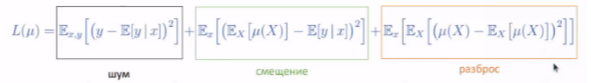

Еще один вариант формулировки:<br>
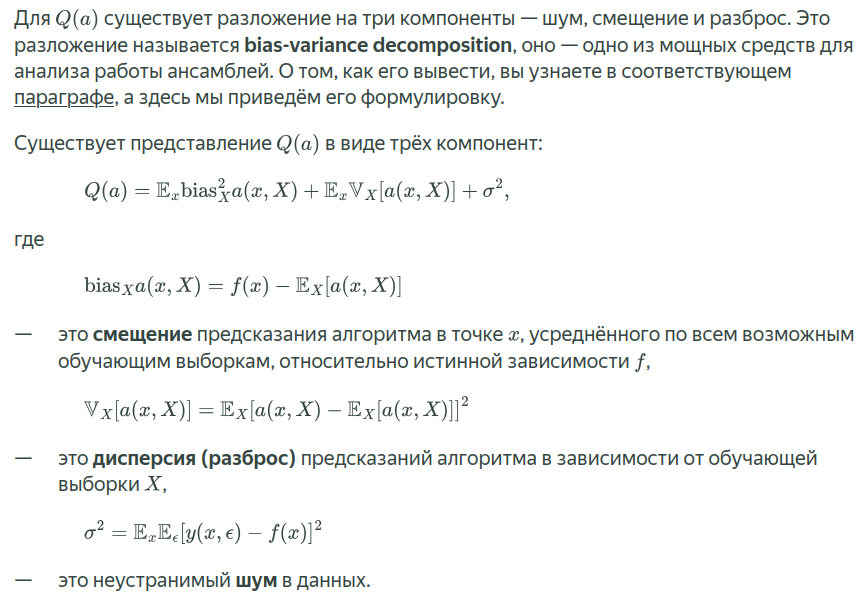

✅Примером алгоритма с низким смещением и высоким разбросом может быть алгоритм решающего дерева:<br>
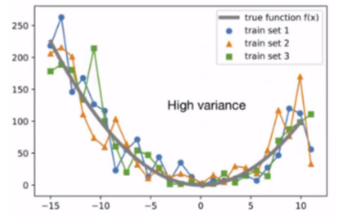<br>
На графике видно низкое смещение относительно истинной функции и высокий разброс, относительно разных моделей.<br>
✅Примером семейства алгоритмов с большим смещением и низким разбросом может послужить линейная регрессия:<br>
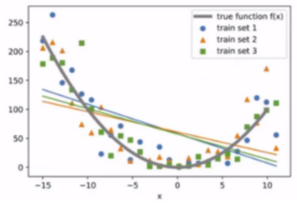<br>
Как видно из графика, линии регрессии сильно отклоняются от реальной функции(связано с тем, что регрессия восстанавливает только линейные
зависимости), в то время как между собой они различаются незначительно.

<h2>🚩Ансамбли</h2>

<b>✅Ансамбли</b> - способ уменьшить смешение и разброс ошибки при помощи объединения нескольких алгоритмов в один итоговый. Рассмотрим виды ансамблей.

<h3>🔮Bagging(Бэггинг, Bootstrap Aggregation)</h3>

✅Сначала стоит сказать, что, вообще то, решающие деревья не очень устойчивы. Это значит, что значения ответа модели будет сильно зависеть от обучающей выборки. Решение такой проблемы состоит в том, чтобы независимо обучать несколько моделей на случайных(различных) подвыборках исходной выборки. Это называется композицией моделей. Далее мы выбираем самый часто встречающийся класс из всех моделей, если это задача классификации, либо же берем среднее между всеми ответами моделей, если имеем дело с задачей регрессии.<br>
✅Есть несколько подходов к обучению базовых моделей(моделей, которые включаются в композицию). Один из таких подходов - Бэггинг. Его суть состоит в том, чтобы независимо обучать базовые модели на разных случайных подвыборках. Подмножество же выбирается при помощи <b>Бутстрапа</b>. Бутстрап это такой способ формирования подвыборки, при котором мы сначала выбираем случайный объект из выборки, помещаем его в подвыборку и возвращаем обратно в общую выборку. И так до тех пор, пока мы не создадим таким образом нужное число случайных подвыборок:<br>
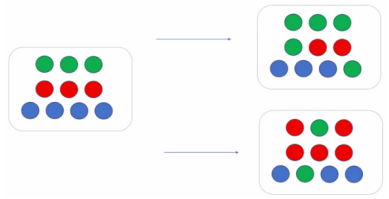<br>
✅Есть также и метод случайных подпространств(часто используется вместе с бутстрапом) - мы случайным образом отбираем какие-то признаки и уже на них обучаем модели. Минус в том, что мы можем выкинуть самый важный признака и оставить самый неважный, вот в чем опасность. Поэтому важно всегда оставлять набор каких-то основных признаков.<br>
✅Теперь про смещение и разброс у композиции:<br>
Смещение композиции $a_n(x)$ равно смещению базовых моделей в композиции $a_n(x)$. Разброс же композиции $a_n(x)$ считается по формуле:<br>
$\frac{1}{N}(var(b_n(x)) + cov(b_n(x), b_m(x)))$<br>
Ковариация тут нужна потому, что подвыборки хоть и случайные, но делаются все таки из одной выборки.<br>
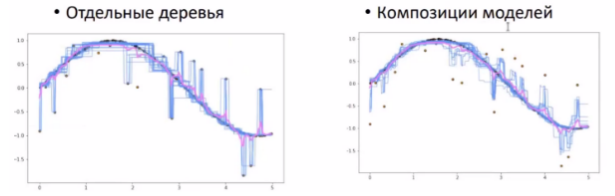<br>
Обычные деревья сильно подстраиваются под выборку, в данном примере под выбросы. В композициях же этот эффект сглаживается. Вывод -композиция имеет более низкий разброс.<br>
❗В бэггинге в качестве базовой модели может быть использованна любая модель машинного обучения.

<h3>🏕️Случайный лес</h3>

<b>✅Случайный лес</b> - это еще один метод обучения композиции моделей. Он состоит в следующем - возьмем всю нашу выборку(запускаем рекурсивную функцию) и будем на ней обучать наши модели по следующему алгоритму:
<ol>
    <li>Если выполнен критерий останова, то выходим из функции.</li>
    <li>Ищем лучший предикат(в случайных лесах признак, по которому производится разбиение, выбирается не из всех возможных признаков, а из лишь их случайного подмножества размера q). Для регрессии - $q=\frac{d}{3}$, для классификации - $q=\sqrt{d}$. 
    </li>
    <li>Разбиваем вершину с помощью лучшего предиката.</li>
    <li>Повторяем для соседних вершин.</li>
</ol>
То есть в нем мы, по факту, используем метод случайных подпространств.<br>
Теперь про алгоритм случайного леса(для n = 1, 2, . . . . N):
<ul>
    <li>Генерируем случайную подвыборку при помощи бутстрапа.</li>
    <li>Строим решающее дерево по подвыборке из предыдущего шага.</li>
    <li>Строим дерево, пока в каждом листе не окажется не более минимального, заданного заранее, числа объектов.</li>
    <li>Оптимальное разбиение в каждой вершине ищем среди ограниченного множества случайных признаков.</li>
</ul>
Отличие от бэггинга именно в том, что мы оптимальный предикат ищем среди ограниченного множества случайных признаков(всегда), а также строим дерево до тех пор, пока в каждом листе не окажется не более минимального, заданного заранее, числа объектов.
❗В случайном лесе в качестве базовой модели можно использовать только решающие деревья! По факту это частный случай бэггинга над решающими деревьями.<br>
<b>✅Основные плюсы решающего леса.</b><br>
Случайные леса не имеют много параметров и с ростом деревьев в них не переобучаются.<br>
<b>✅Недостатки случайного леса.</b><br>
Случайный лес долго обучается даже на небольшом датасете, а также после этого долго применяется. Также есть некоторые вопросы к смещенности моделей - вдруг не получится найти оптимальную модель?

<h3>🏌️Градиентный Бустинг</h3>

✅Суть алгоритма состоит в том, чтобы каждый раз вычислять производную нашей функции потерь по выходу в конечной точке(сдвиг). Знак сдвига показывает, в какую сторону следует сдвигаться, а значение - как сильно можно уменьшить ошибку, если сдвинуть прогноз. То есть в этом подходе мы будем использовать сдвиги - производные от функции потерь. К сдвигу мы добавляем минус, так как движемся в сторону минимума. Сдвигаться мы будем до тех пор, пока значение сдвига не будет незначительным, так как у градиентного бустинга есть некий минимум, пройдя который модель начинает переобучаться. В градиентом бустинге сдвигом называют производную нашей функции потерь по выходу в конечной точке. На нем мы и обучаем каждую нашу новую базовую модель в композиции. К сдвигу мы добавляем минус в начале, так как движемся к минимуму.<br>
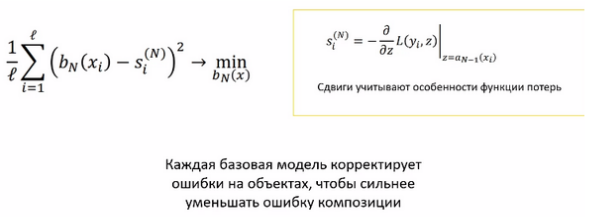<br>
Суть бустинга в последовательном обучении композиции, то есть каждая новая модель в композиции доучивается на предыдущих(исправляет их ошибки). Отличная аналогия из жизни - гольфист, который каждым новым ударом клюшки приблежает мяч к лунке.<br>
✅Обычно за базовую модель берут неглубокое дерево. Разброс ниже будет все таки у неглубоких деревьев(глубокие сильнее переобучаются), а смещение все равно будет уменьшаться с ростом числа моделей в композиции.

✅Проблема бустинга состоит в том, что сдвиги могут не справляться с приближением антиградиента. В таком случае каждую следующую модель в композицию мы будем добавлять с небольшим весом. Чем меньше вес у базовых моделей, тем больше базовых моделей придется построить.<br>
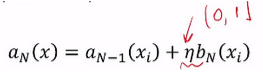<br>
Вообще и тут есть свой аналог стохастического градиентного спуска - можно обучать каждую базовую модель на случайной подвыборке из всей выборки.<br>
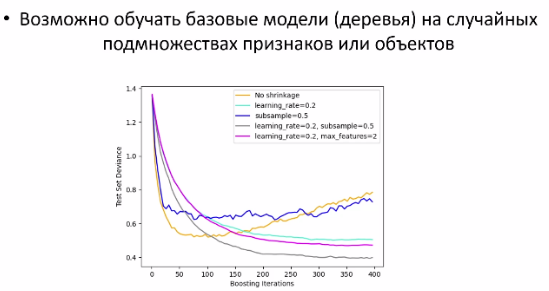<br>
С градиентным бустингом можно экспериментировать, в каждой библиотеке он реализован по-разному. В sklearn, вообще говоря, бустинг реализован не очень хорошо. К популярным реализациям бустинга относятся такие библиотеки, как YandexCatBoost, XGBoodt, LightGBM. Основные(их может быть и больше, все зависит от реализации) же гипер параметры бустинга такие:<br>
<ul>
    <li>Число деревьев</li>
    <li>Глубина базовых деревьев</li>
    <li>Длина шага</li>
    <li>Размер подвыборки для обучения</li>
    <li>Размер подвыборки признаков</li>
    <li>И другие….</li>
</ul>